In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import genfromtxt
Im0,B0=genfromtxt("magnet.csv",delimiter=',',skip_header=1).T
len(Im0)

10

In [3]:
sIm=0.01
sB=10

(0, 1.45, 0, 850)

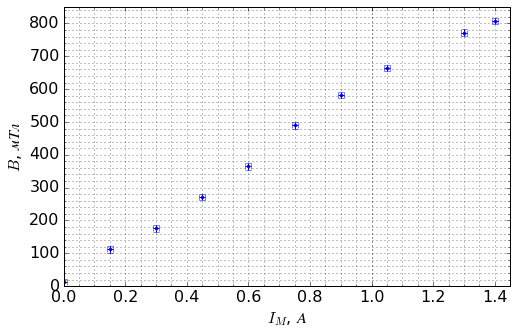

In [4]:
rcParams['font.size']='16'
rcParams['figure.figsize']="8,5"
errorbar(Im0,B0,xerr=sIm,yerr=sB,fmt='.')
minorticks_on()
grid(which="both")
ylabel("$B$, $мТл$")
xlabel("$I_M$, $А$")
axis((0,1.45,0,850))

In [5]:
data=genfromtxt("hall-eds.csv",delimiter=';')
Im=data[1:,0]
B=B0[:-1]
I=data[0,1:]
U34=data[1:,1:]
Uh=array(U34)
for i in range(len(Im)):
    for j in range(len(I)):
        Uh[i,j]=U34[0,j]-Uh[i,j]
sU=1.0
cI=0.01
Imax=1.5
gamma=2
sI=sqrt(cI**2+(Imax*gamma*1e-2)**2)
sI

0.031622776601683791

4.99e-02 1.51e-03
6.76e-02 1.63e-03
8.50e-02 1.77e-03
1.01e-01 1.92e-03
1.19e-01 2.09e-03
1.34e-01 2.26e-03
1.51e-01 2.45e-03
1.68e-01 2.64e-03


(0, 800, 0, 140)

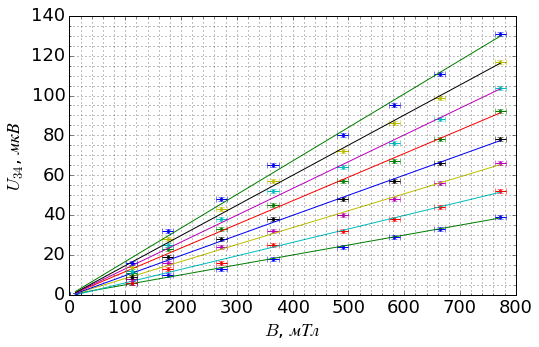

In [26]:
def lin(x,y,z):
    return x*y+z
from scipy.optimize import curve_fit
rcParams['figure.figsize']="8,5"
k,sk=zeros((2,len(I)))
for i in range(len(I)):
    ko,sko=curve_fit(lin,B,Uh[:,i],sigma=sU,absolute_sigma=False)
    k[i],sk[i]=ko[0],sqrt(sko[0,0])
for i in range(len(I)):
    errorbar(B,Uh[:,i],xerr=sB,yerr=sU,fmt='.')
    ko,sko=curve_fit(lin,B,Uh[:,i],sigma=sqrt(sU**2+(k[i]*sB)**2),absolute_sigma=True)
    k[i],sk[i]=ko[0],sqrt(sko[0,0])
    print("{0:0.2e} {1:0.2e}".format(k[i],sk[i]))
    plot(B,B*ko[0]+ko[1])
minorticks_on()
grid(which="both")
ylabel("$U_{34}$, $мкВ$")
xlabel("$B$, $мТл$")
axis((0,800,0,140))

1.69e-01 2.65e-03


(0, 800, 0, 140)

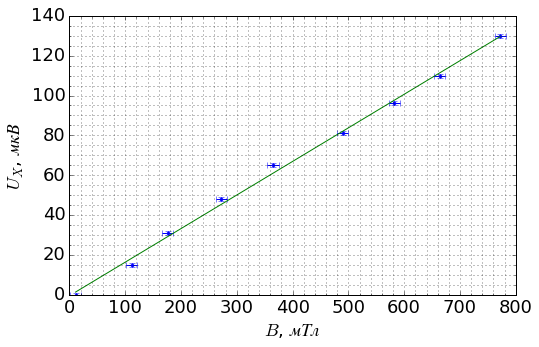

In [27]:
Im1,U34b=genfromtxt("hall-eds-back.csv",delimiter=',',skip_header=1).T
Uhb=array(U34b)
for i in range(len(U34b)):
    Uhb[i]-=U34b[0]
rcParams['figure.figsize']="8,5"
errorbar(B,Uhb,xerr=sB,yerr=sU,fmt='.')
ko,sko=curve_fit(lin,B,Uhb,sigma=sU,absolute_sigma=False)
koo,skoo=ko[0],sqrt(sko[0,0])
ko,sko=curve_fit(lin,B,Uhb,sigma=sqrt(sU**2+(koo*sB)**2),absolute_sigma=True)
koo,skoo=ko[0],sqrt(sko[0,0])
print("{0:0.2e} {1:0.2e}".format(koo,skoo))
plot(B,B*ko[0]+ko[1])
minorticks_on()
grid(which="both")
ylabel("$U_X$, $мкВ$")
xlabel("$B$, $мТл$")
axis((0,800,0,140))

1.68e-01 1.12e-03


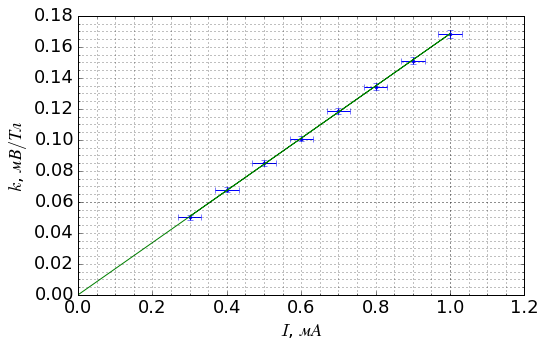

In [30]:
def lin0(x,y):
    return x*y
errorbar(I,k,xerr=sI,yerr=sk,fmt='.')
ko,sko=curve_fit(lin0,I,k,sigma=sk,absolute_sigma=True)
kk,skk=ko[0],sqrt(sko[0,0])
print("{0:0.2e} {1:0.2e}".format(kk,skk))
I1=array(list(I)+[0.0])
plot(I1,I1*kk)
minorticks_on()
grid(which="both")
ylabel("$k$, $мВ/Тл$")
xlabel("$I$, $мА$")

In [31]:
a=2.2e-3
sa=.1e-3
Rx=a*kk
sRx=sqrt((sa*kk)**2+(a*skk)**2)
print(Rx,sRx)
e=1.6e-19
n=1/(e*Rx)
sn=sRx/Rx*n
print(n,sn)

0.000370576090733 1.70246511661e-05
1.68656320693e+22 7.74824684742e+20


In [32]:
L35=3.0e-3
a=2.2e-3
l=2.5e-3
I35=1.0
U35=1.74
sU35=0.04
sigma=I35*L35/(U35*a*l)
ssigma=sigma*sqrt((sI/I35)**2+(.1e-3/L35)**2+(.1e-3/a)**2+(.1e-3/l)**2+(sU35/U35)**2)
print(sigma,ssigma)

313.4796238244514 24.8929236892


In [33]:
b=sigma*Rx
sb=sqrt((ssigma*Rx)**2+(sigma*sRx)**2)
print(b,sb)

0.116168053521 0.0106572887639


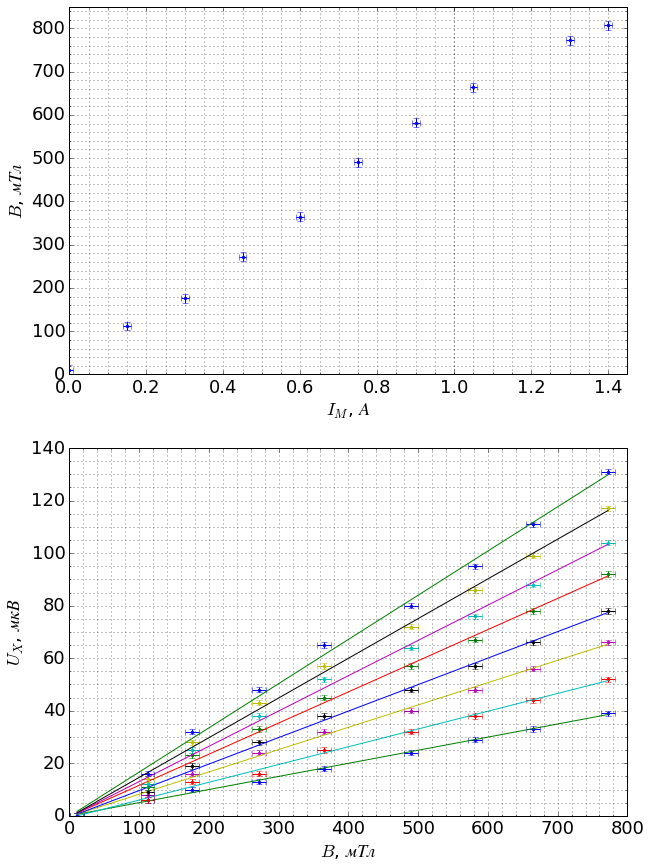

In [36]:
rcParams['figure.figsize']="10,14.5"
rcParams['figure.dpi']="300"
rcParams['font.size']="18"
subplot(211)
errorbar(Im0,B0,xerr=sIm,yerr=sB,fmt='.')
minorticks_on()
grid(which="both")
ylabel("$B$, $мТл$")
xlabel("$I_M$, $А$")
axis((0,1.45,0,850))
subplot(212)
for i in range(len(I)):
    errorbar(B,Uh[:,i],xerr=sB,yerr=sU,fmt='.')
    ko,sko=curve_fit(lin,B,Uh[:,i],sigma=sU,absolute_sigma=False)
    plot(B,B*ko[0]+ko[1])
minorticks_on()
grid(which="both")
ylabel("$U_X$, $мкВ$")
xlabel("$B$, $мТл$")
axis((0,800,0,140))
savefig("graphs1.svg")

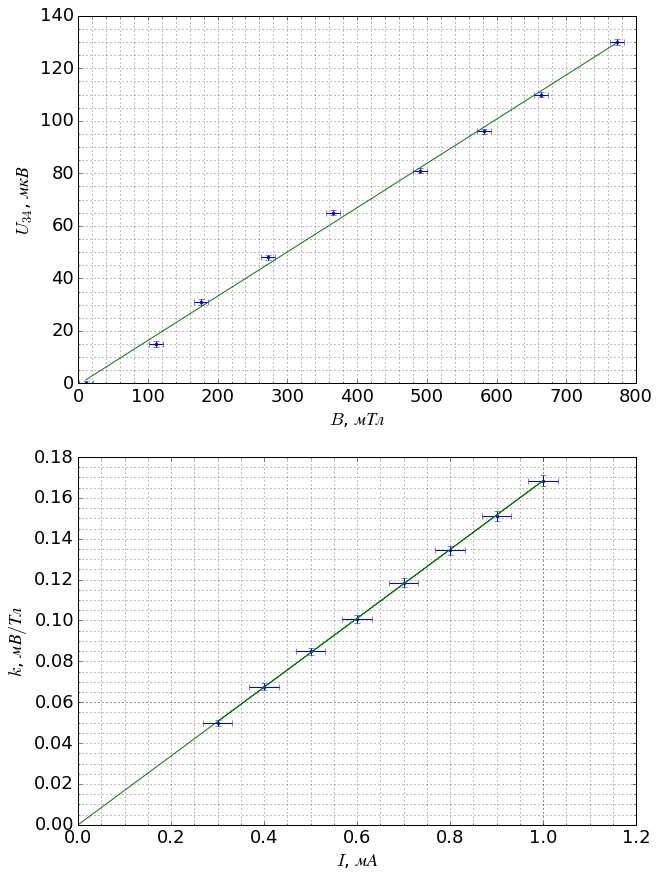

In [37]:
rcParams['figure.figsize']="10,14.5"
rcParams['figure.dpi']="300"
rcParams['font.size']="18"
subplot(211)
errorbar(B,Uhb,xerr=sB,yerr=sU,fmt='.')
ko,sko=curve_fit(lin,B,Uhb,sigma=sU,absolute_sigma=False)
plot(B,B*ko[0]+ko[1])
minorticks_on()
grid(which="both")
ylabel("$U_{34}$, $мкВ$")
xlabel("$B$, $мТл$")
axis((0,800,0,140))
subplot(212)
errorbar(I,k,xerr=sI,yerr=sk,fmt='.')
I1=array(list(I)+[0.0])
plot(I1,I1*kk)
minorticks_on()
grid(which="both")
ylabel("$k$, $мВ/Тл$")
xlabel("$I$, $мА$")
savefig("graphs2.svg")